In [21]:
netlist_data = """
.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   #SQUIDL1(1.71)pH fcheck
L2                 3         4   #SQUIDL1(1.71)pH fcheck
B1                 1         5   jjmod area=#JJAREA1(v=0.41,shunt = JJSHUNT1)
R1                 1         5   #JJSHUNT1(18.66)ohm
B2                 2         5   jjmod area=#JJAREA1(v=0.41)
R2                 2         5   #JJSHUNT1(18.66)ohm
B3                 4         2   pjjmod area=#PJJAREA1(20, fix = true, dp = false)
.ends

.subckt psquid2        3  5 
L1                 3         1   #SQUIDL2(1.33)pH fcheck
L2                 3         4   #SQUIDL2(1.33)pH fcheck
B1                 1         5   jjmod area=#JJAREA2(v=0.34, shunt = JJSHUNT2)
R1                 1         5   #JJSHUNT2(23.04)ohm
B2                 2         5   jjmod area=#JJAREA2(v=0.34)
R2                 2         5   #JJSHUNT2(23.04)ohm
B3                 4         2   pjjmod area=#PJJAREA2(20, fix = true, dp = false)
.ends

.subckt psquid3        3  5 
L1                 3         1   #SQUIDL3(1.5)pH fcheck
L2                 3         4   #SQUIDL3(1.5)pH fcheck
B1                 1         5   jjmod area=#JJAREA3(v=0.41, shunt = JJSHUNT3)
R1                 1         5   #JJSHUNT3(18.87)ohm
B2                 2         5   jjmod area=#JJAREA3(v=0.41)
R2                 2         5   #JJSHUNT3(18.87)ohm
B3                 4         2   pjjmod area=#PJJAREA3(20, fix = true, dp = false)
.ends

.subckt psquid4        3  5 
L1                 3         1   #SQUIDL4(1.5)pH fcheck
L2                 3         4   #SQUIDL4(1.5)pH fcheck
B1                 1         5   jjmod area=#JJAREA4(v=0.31, shunt = JJSHUNT4)
R1                 1         5   #JJSHUNT4(25)ohm
B2                 2         5   jjmod area=#JJAREA4(v=0.31)
R2                 2         5   #JJSHUNT4(25)ohm
B3                 4         2   pjjmod area=#PJJAREA4(20, fix = true, dp = false)
.ends

.subckt psquid5        3  5 
L1                 3         1   #SQUIDL5(1.59)pH fcheck
L2                 3         4   #SQUIDL5(1.59)pH fcheck
B1                 1         5   jjmod area=#JJAREA5(v=0.45, shunt = JJSHUNT5)
R1                 1         5   #JJSHUNT5(17.36)ohm
B2                 2         5   jjmod area=#JJAREA5(v=0.45)
R2                 2         5   #JJSHUNT5(17.36)ohm
B3                 4         2   pjjmod area=#PJJAREA5(20, fix = true, dp = false)
.ends

.subckt psquid6        3  5 
L1                 3         1   #SQUIDL6(1.38)pH fcheck
L2                 3         4   #SQUIDL6(1.38)pH fcheck
B1                 1         5   jjmod area=#JJAREA6(v=0.36, shunt = JJSHUNT6)
R1                 1         5   #JJSHUNT6(21.4)ohm
B2                 2         5   jjmod area=#JJAREA6(v=0.36)
R2                 2         5   #JJSHUNT6(21.4)ohm
B3                 4         2   pjjmod area=#PJJAREA6(20, fix = true, dp = false)
.ends
* ============================================

.subckt DCHFQ 1 6 100
* 250-350  750-850  1250-1350
Rin                     1        2    #DCHFQR1(1240, dpv = 20)ohm
L0                      2        3    2pH fcheck
L1                      3        0    #DCHFQL1(35.7, dpv = 13)pH fcheck
X1       psquid1         3        4
L3                      4        5    #DCHFQL2(4.26)pH fcheck
L4                      5        6    #DCHFQL3(2.02)pH fcheck
R1                      100      5    #DCHFQR2(102)ohm
X2       psquid2         6        0
.ends


.subckt JTL     1  5  100
L1               1  2   #JTLL1(14)pH fcheck
L2               2  3   #JTLL1(14)pH fcheck
L3               3  4   #JTLL1(14)pH fcheck
L4               4  5   #JTLL1(14)pH fcheck
X1    psquid3     3  0
X2    psquid3     5  0
R1               100  4   #JTLR1(129.71)ohm
.ends


.subckt JTL4    1  5  100
X1       JTL            1  2  100
X2       JTL            2  3  100
X3       JTL            3  4  100
X4       JTL            4  5  100
.ends


.subckt DFF 1 4 9 100
L1                      1  2  #DFFL1(17.66, dpv = 10)pH fcheck  
X1       psquid4        2  3
L2                      3  7  #DFFL2(1.94)pH fcheck

L3                      4  5  #DFFL3(13.48)pH fcheck
L4                      5  6  #DFFL3(13.48)pH fcheck
X2       psquid5        6  0
L5                      6  7  #DFFL5(26.76, dpv = 20)pH  fcheck
R1                      100  7  #DFFR1(109.86, dpv = 12)ohm
L6                      7  8  #DFFL6(26.55, dpv = 20)pH fcheck
L7                      8  9  2pH fcheck
X3       psquid6        9  0
.ends

*** top cell: 
Vin1                1       0   PWL(0ps 0mV 640ps 0mV 650ps 25mV 750ps 25mV 760ps 0mV   1040ps 0mV 1050ps 25mV 1150ps 25mV 1160ps 0mV   1440ps 0mV 1450ps 25mV 1550ps 25mV 1560ps 0mV)
X1      DCHFQ       1       2   100
X2      JTL4        2       3   100
X3      JTL4        3       4   100

Vin2                5       0   PWL(0ps 0mV 440ps 0mV 450ps 25mV 550ps 25mV 560ps 0mV   1240ps 0mV 1250ps 25mV 1350ps 25mV 1360ps 0mV)
X4     DCHFQ       5       6   100
X5      JTL4        6       7   100
X6      JTL4        7       8   100
X7      DFF         4       8   9   100
X8      JTL4        9       10  100
X9      JTL4        10      11  100
R1                  11      13      8.32ohm
L1                  13      0       2pH fcheck
Vb                  100     0       pwl(0ps 0mV 100ps 1.13mV)


**netlis file
.tran 1.0ps 2000ps 0ps 1ps


.print phase B1|X2|X1|X2
.print phase B2|X2|X1|X2

.print phase B1|X2|X1|X5
.print phase B2|X2|X1|X5

.print phase B1|X1|X1|X9
.print phase B2|X1|X1|X9

.end

**** optimize ****
* バイアス電圧の立ち上がり終了の時間
* EndTimeOfBiasRise=100e-12
* 初期パルスの入力開始時間
* StartTimeOfPulseInput=400e-12
"""

In [22]:
import importlib
from optimize import data
importlib.reload(data)

d = data.Data(netlist_data, show = False)

In [ ]:
d.scatter_apply()


.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)

* PYSQUID=====================================
.subckt psquid1        3  5 
L1                 3         1   1.71pH fcheck
L2                 3         4   1.71pH fcheck
B1                 1         5   jjmod area=0.41
R1                 1         5   18.66ohm
B2                 2         5   jjmod area=0.41
R2                 2         5   18.66ohm
B3                 4         2   pjjmod area=20.0
.ends

.subckt psquid2        3  5 
L1                 3         1   1.33pH fcheck
L2                 3         4   1.33pH fcheck
B1                 1         5   jjmod area=0.34
R1                 1         5   23.04ohm
B2                 2         5   jjmod area=0.34
R2                 2         5   23.04ohm
B3                 4         2   pjjmod area=20.0
.ends

.subckt psquid3        3  5 
L1                 3     

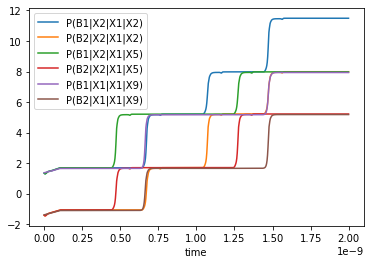

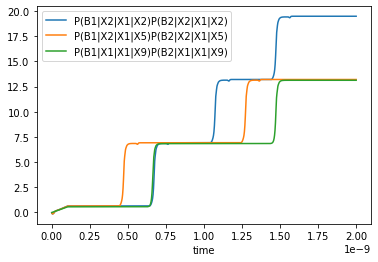

In [19]:
d.default_simulation(True)

In [20]:
from optimize import margin
importlib.reload(margin)

# res = margin.get_margins(d)
# margin.plot(res)
margin.optimize(d,'/home/tanetakumi/main/hfq-optimizer/template/optimize/opt_dff8')




ばらつき0 : 0回目の最適化開始
最小マージン :  JJAREA3    20.312499999999993
ばらつき0 : 0回目の最適化終了
ばらつき0 : 1回目の最適化開始


KeyboardInterrupt: 

In [ ]:
# margin.plot(res)